In [1]:
SetDirectory["~/Documents/Univ/2nd_GW_QCD"];

In [2]:
SetOptions[{Plot,LogPlot,LogLinearPlot,LogLogPlot},
           {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3]}];
SetOptions[{ListPlot,ListLogPlot,ListLogLinearPlot,ListLogLogPlot},
           {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3],
            Joined->True}];
RGBData = {"#5E81B5","#E19C24","#8FB032","#EB6235","#8778B3","#C56E1A","#5D9EC7","#FFBF00","#A5609D","#929600","#E95536","#6685D9","#F89F13","#BC5B80","#47B66D"};
Color = Map[RGBColor,RGBData];

2
 x - xc  (-5 - 6 cs  + 3 w)/(2 + 6 w)
(-------)                             
 2 + 6 w
 
                            4     2                         2
             Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>   (BesselJ[-------------------------------------------------, cs (x - xc)] 
                                  2 + 6 w
 
                                           4     2                         2
                            Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>      C$28264[1] + BesselY[-------------------------------------------------, 
                                                 2 + 6 w
 
>       cs (x - xc)] C$28264[2])
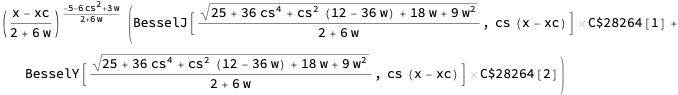

In [50]:
Phisol[x_,xc_,w_,cs_] = Simplify[Phi[x]/(2+6w)^(-(5+6cs^2-3w)/(2+6w)) /. DSolve[Phi''[x] + 6(1+cs^2)/(1+3w)/(x-xc) Phi'[x] + (cs^2+12(cs^2-w)/(1+3w)^2/(x-xc)^2)Phi[x] == 0, 
                    Phi[x], x, GeneratedParameters:>Unique[C]][[1]], {w>=0,cs>=0}]

In [51]:
ConstC1 = C$28264[1];
ConstC2 = C$28264[2];

3     1                          3     1
8 (BesselJ[-, -------] C$28264[1] + BesselY[-, -------] C$28264[2])
           2  Sqrt[3]                       2  Sqrt[3]
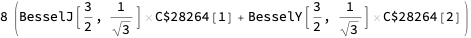

In [62]:
Phisol[1,0,1/3,1/Sqrt[3]]

In [62]:
Expand[(5+6cs^2-3w)^2-48(cs^2-w)]

2        4               2        2
25 + 12 cs  + 36 cs  + 18 w - 36 cs  w + 9 w

nu
       x
-----------------
 nu
2   Gamma[1 + nu]
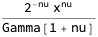

In [64]:
Normal[Series[BesselJ[nu,x],{x,0,1}]]

2
-5 - 6 cs  + 3 w
----------------
    2 + 6 w
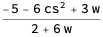

In [39]:
nu = Sqrt[25+12cs^2+36cs^4+18w-36cs^2 w+9w^2]/(2+6w);
Simplify[-Sqrt[nu^2+12(cs^2-w)/(1+3w)^2], {w>=0,5+6cs^2-3w>=0}]
Clear[nu]

In [38]:
Phi1[x_] = Phisol[x] /. {ConstC1 -> 1, ConstC2 -> 0};

x
                   Sqrt[3] Sin[-------]
           x                   Sqrt[3]
9 (-Cos[-------] + --------------------)
        Sqrt[3]             x
----------------------------------------
                    2
                   x
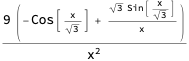

In [39]:
PhiRD[x_] = (Phi1[x] /. {w->1/3, cs->1/Sqrt[3], xc->0}) / Limit[Phi1[x] /. {w->1/3, cs->1/Sqrt[3], xc->0}, x->0]

2
                     t - xc  (5 + 6 cs  - 3 w)/(2 + 6 w)
{{C$22725[1] -> (-2 (-------)                            
                     2 + 6 w
 
                            2
          -xc + xt (5 + 6 cs  - 3 w)/(2 + 6 w)
>        (--------)                            
          2 + 6 w
 
                                2
              t - xc  (-5 - 6 cs  + 3 w)/(2 + 6 w)
>        ((9 (-------)                             
              2 + 6 w
 
                           2
>             ((2 (5 + 6 cs  - 3 w) 
 
                                          4     2                         2
                           Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>                  BesselY[-------------------------------------------------, 
                                                2 + 6 w
 
>                   cs (t - xc)]) / (t - xc) - 
 
>               2 cs (1 + 3 w) (BesselY[-1 + 
 
                                    4     2                         2
                     Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>                    -------------------------------------------------, cs (t - xc)] - 
                                          2 + 6 w
 
                                              4     2                         2
                               Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>                  BesselY[1 + -------------------------------------------------, 
                                                    2 + 6 w
 
                                             xt                     xt
>                   cs (t - xc)])) (xt Cos[-------] - Sqrt[3] Sin[-------])) / 
                                           Sqrt[3]                Sqrt[3]
 
                                                       2
                           3        -xc + xt (-5 - 6 cs  + 3 w)/(2 + 6 w)
>           (2 (2 + 6 w) xt ) - (3 (--------)                             
                                    2 + 6 w
 
                                     4     2                         2
                      Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>             BesselY[-------------------------------------------------, cs (-xc + xt)] 
                                           2 + 6 w
 
                          xt                       2        xt           4
>             (9 xt Cos[-------] + Sqrt[3] (-9 + xt ) Sin[-------])) / xt )) / 
                        Sqrt[3]                           Sqrt[3]
 
                                                     4     2                         2
                     2                Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>      (-((((5 + 6 cs  - 3 w) BesselJ[-------------------------------------------------, 
                                                           2 + 6 w
 
>                 cs (t - xc)]) / ((1 + 3 w) (t - xc)) + 
 
                                               4     2                         2
                                Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>             cs (-BesselJ[-1 + -------------------------------------------------, 
                                                     2 + 6 w
 
>                  cs (t - xc)] + BesselJ[1 + 
 
                                  4     2                         2
                   Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>                  -------------------------------------------------, cs (t - xc)])) 
                                        2 + 6 w
 
                                   4     2                         2
                    Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>           BesselY[-------------------------------------------------, cs (-xc + xt)]) + 
                                         2 + 6 w
 
                                4     2                         2
                 Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>        BesselJ[-------------------------------------------------, cs (-xc +
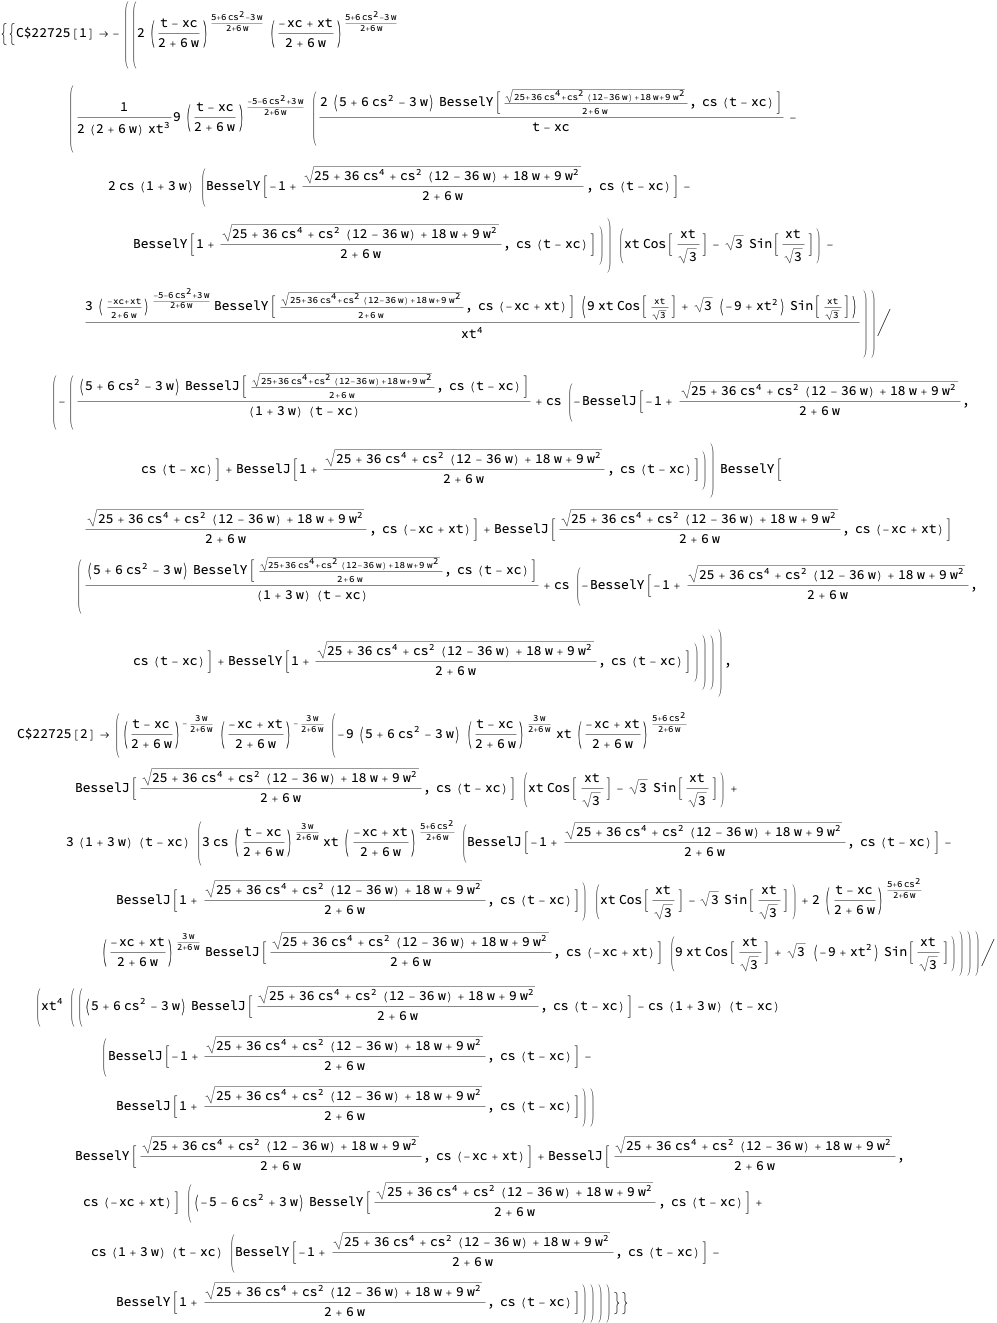

In [40]:
Solve[PhiRD[xt] == Phisol[xt] && PhiRD'[xt] == Phisol'[t], {ConstC1,ConstC2}] // Simplify

1/2 - 3/(1 + 3 w)
(2                  Sqrt[-I (x - xc)] 
 
        1/(1 + 3 w)         3 (-1 + w)
>     (8            BesselK[----------, -I (x - xc)] C[2] + 
                             2 + 6 w
 
         w/(1 + 3 w)                  3 (-1 + w)                          -1 + 9 w
>       8            Sqrt[Pi] BesselI[----------, -I (x - xc)] C[1] Gamma[--------])) / 
                                       2 + 6 w                            2 + 6 w
 
>   Sqrt[Pi]
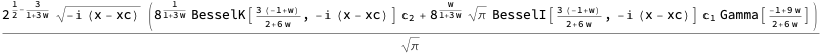

In [303]:
Gsol[x_] = Simplify[FunctionExpand[G[x] /. DSolve[G''[x]+(1-2(1-3w)/(1+3w)^2/(x-xc)^2)G[x] == 0, G[x], x][[1]]], {xc>0,x>xc}]

In [8]:
3(-1+w)/(2+6w) /. {w->1/3}

1
-(-)
  2

In [17]:
G1[x_] = Sqrt[x-xc] BesselJ[nu,x-xc];
G2[x_] = Sqrt[x-xc] BesselY[nu,x-xc];

In [19]:
FunctionExpand[D[G1[x],x,x]+(1-2(1-3w)/(1+3w)^2/(x-xc)^2)G1[x] /. {nu->3(-1+w)/(2+6w)}]

0

(Pi Sqrt[(eta k - xc) (etap k - xc)] 
 
>     (BesselJ[nu, etap k - xc] BesselY[nu, eta k - xc] - 
 
>       BesselJ[nu, eta k - xc] BesselY[nu, etap k - xc])) / (2 k)
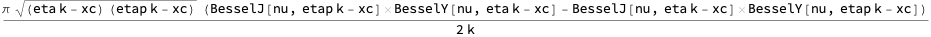

In [86]:
GreenGmode[k_,eta_,etap_,xc_,nu_] = FullSimplify[(G1[k eta]G2[k etap] - G2[k eta]G1[k etap]) / (D[G1[k etap],etap]G2[k etap] - G1[k etap]D[G2[k etap],etap]), 
                                                {eta>xc/k, etap>xc/k, k>0, xc>0}]

Sin[(eta - etap) k]
-------------------
         k
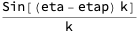

In [72]:
GreenGRD[k_,eta_,etap_] = Simplify[GreenGMode[k,eta,etap] /. {xc->0, nu->-1/2}, {eta>0,etap>0,k>0}]

-Graphics-
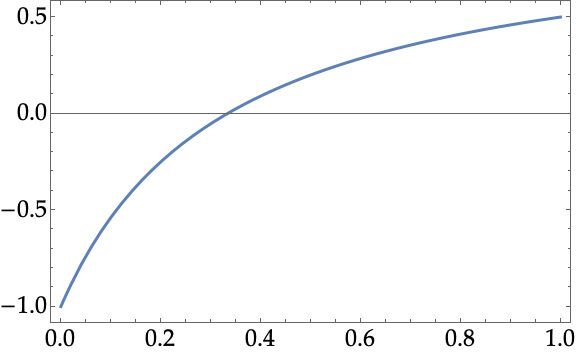

In [32]:
Plot[-(1-3w)/(1+3w),{w,0,1}]

n
      x
---------------
 n
2  Gamma[1 + n]
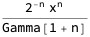

In [14]:
Normal[Series[BesselJ[n,x],{x,0,1}]]

n                         n
  x  Cos[n Pi] Gamma[-n]    2  Gamma[n]
-(----------------------) - -----------
           n                       n
          2  Pi                Pi x
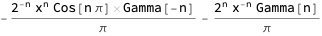

In [15]:
Normal[Series[BesselY[n,x],{x,0,1}]]

In [59]:
abefore[eta_] = a0 eta/eta0;
aafter[eta_] = a0 ((eta-etac)/eta0)^(2/(1+3w));

Inverse functions are being used by `1`, so some solutions may not be found; use Reduce for complete solution information.: Inverse functions are being used by Solve, so some solutions may not be found; use Reduce for complete solution information.

Sqrt[etat]  1 + 3 w
{{etac -> -(eta0 (-(----------))       ) + etat}, 
                    Sqrt[eta0]
 
                     Sqrt[etat] 1 + 3 w
>   {etac -> -(eta0 (----------)       ) + etat}}
                     Sqrt[eta0]
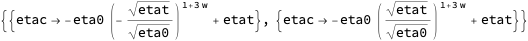

In [63]:
Solve[Simplify[abefore[etat] == aafter[etat] && abefore'[etat] == aafter'[etat]], etac]

-etac + etat -1 + 2/(1 + 3 w)
                                                    2 a0t (------------)
a0 etat         -etac + etat 2/(1 + 3 w)     a0               eta0t
------- == a0t (------------)            && ---- == ------------------------------------
 eta0              eta0t                    eta0             eta0t + 3 eta0t w
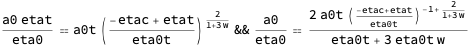

In [58]:
Simplify[abefore[etat] == aafter[etat] && abefore'[etat] == aafter'[etat]]

## sudden change

In [221]:
etac[etas_,w_] = -(1-3w)/(1+3w) etas;
xc[xs_,w_] = -(1-3w)/(1+3w) xs;
scalea[eta_,etas_,w_] := eta/etas /; eta<=etas
scalea[eta_,etas_,w_] := (2/(1+3w))^(-2/(1+3w))((eta-etac[etas,w])/etas)^(2/(1+3w)) /; eta>etas;
calH[eta_,etas_,w_] := 1/eta /; eta<=etas
calH[eta_,etas_,w_] := 2/(1+3w)/(eta-etac[eta,w]) /; eta>etas
EoSw[eta_,etas_,w_] := 1/3 /; eta<=etas
EoSw[eta_,etas_,w_] := w /; eta>etas

-Graphics-
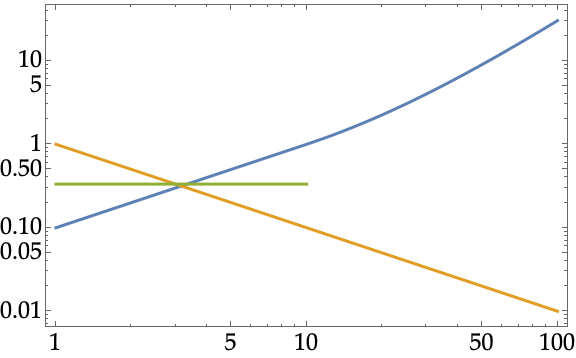

In [229]:
LogLogPlot[{scalea[eta,10,0],calH[eta,10,0],EoSw[eta,10,0]}, {eta,1,100}]

2
 x - xc  (-5 - 6 cs  + 3 w)/(2 + 6 w)
(-------)                             
 2 + 6 w
 
                            4     2                         2
             Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>   (BesselJ[-------------------------------------------------, cs (x - xc)] 
                                  2 + 6 w
 
                                           4     2                         2
                            Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>      C$47420[1] + BesselY[-------------------------------------------------, 
                                                 2 + 6 w
 
>       cs (x - xc)] C$47420[2])
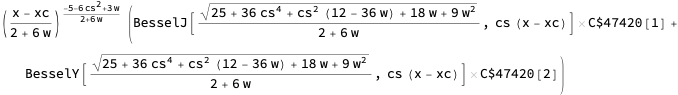

In [117]:
Phisol[x_,xc_,w_,cs_] = Simplify[Phi[x]/(2+6w)^(-(5+6cs^2-3w)/(2+6w)) /. DSolve[Phi''[x] + 6(1+cs^2)/(1+3w)/(x-xc) Phi'[x] + (cs^2+12(cs^2-w)/(1+3w)^2/(x-xc)^2)Phi[x] == 0, 
                    Phi[x], x, GeneratedParameters:>Unique[C]][[1]], {w>=0,cs>=0}]

In [118]:
ConstC1 = C$47420[1];
ConstC2 = C$47420[2];

x
                   Sqrt[3] Sin[-------]
           x                   Sqrt[3]
9 (-Cos[-------] + --------------------)
        Sqrt[3]             x
----------------------------------------
                    2
                   x
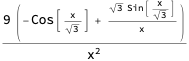

In [123]:
PhiRD[x_] = (Phisol[x,0,1/3,1/Sqrt[3]] /. {ConstC1->1, ConstC2->0}) / Limit[Phisol[x,0,1/3,1/Sqrt[3]] /. {ConstC1->1, ConstC2->0}, x->0]

In [175]:
Phipsol[x_,xc_,w_,cs_] = D[Phisol[x,xc,w,cs],x] // Simplify;

In [176]:
Csol = Solve[PhiRD[xs] == Phisol[xs,xc[xs,w],w,cs] && PhiRD'[xs] == Phipsol[xs,xc[xs,w],w,cs], {ConstC1,ConstC2}][[1]] // Simplify;

In [230]:
Phijunc[x_,xs_,w_,cs_] = Phisol[x,xc[xs,w],w,cs] /. Csol // Simplify;
Phipjunc[x_,xs_,w_,cs_] = Phipsol[x,xc[xs,w],w,cs] /. Csol // Simplify;

In [232]:
Phifull[x_,xs_,w_,cs_] := PhiRD[x] /; x<=xs
Phifull[x_,xs_,w_,cs_] := Phijunc[x,xs,w,cs] /; x>xs
Phipfull[x_,xs_,w_,cs_] := PhiRD'[x] /; x<=xs
Phipfull[x_,xs_,w_,cs_] := Phipjunc[x,xs,w,cs] /; x>xs

-Graphics-
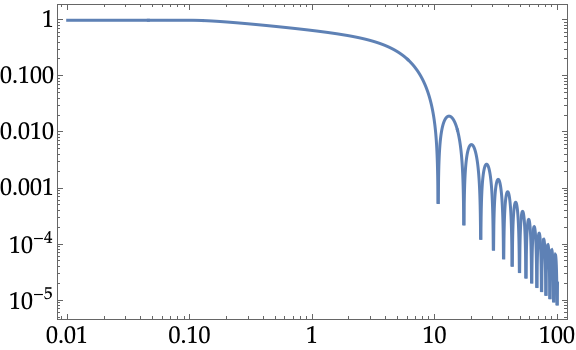

In [201]:
LogLogPlot[Abs[Phifull[x,0.1,0.1,0.5]],{x,0.01,100}, PlotRange->Full]

3 (-1 + w)
Sqrt[x - xc] BesselJ[-----------, x - xc] D$111400[1] + 
                     2 (1 + 3 w)
 
                         3 (-1 + w)
>   Sqrt[x - xc] BesselY[-----------, x - xc] D$111400[2]
                         2 (1 + 3 w)
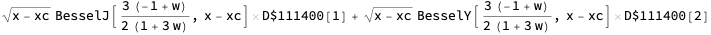

In [318]:
gsol[x_] = g[x] /. DSolve[g''[x]+(1-2(1-3w)/(1+3w)^2/x^2)g[x] == 0, g[x], x, GeneratedParameters:>Unique[D]][[1]] /. {x->x-xc}

In [320]:
ConstD1 = D$111400[1];
ConstD2 = D$111400[2];

In [322]:
g1RD[x_] = Sin[x];
g2RD[x_] = Cos[x];

In [365]:
Dsol1 = Solve[(g1RD[k etas] == gsol[k etas] && D[g1RD[k etas], etas] == D[gsol[k etas], etas]) /. {xc->k etac[etas,w]}, {ConstD1, ConstD2}][[1]] // Simplify;
Dsol2 = Solve[(g2RD[k etas] == gsol[k etas] && D[g2RD[k etas], etas] == D[gsol[k etas], etas]) /. {xc->k etac[etas,w]}, {ConstD1, ConstD2}][[1]] // Simplify;

In [367]:
g1junc[k_,eta_,etas_,w_] = gsol[k eta] /. Dsol1 /. {xc->k etac[etas,w]} // Simplify;
g2junc[k_,eta_,etas_,w_] = gsol[k eta] /. Dsol2 /. {xc->k etac[etas,w]} // Simplify;
g1pjunc[k_,eta_,etas_,w_] = D[gsol[k eta], eta] /. Dsol1 /. {xc->k etac[etas,w]} // Simplify;
g2pjunc[k_,eta_,etas_,w_] = D[gsol[k eta], eta] /. Dsol2 /. {xc->k etac[etas,w]} // Simplify;

-Graphics-
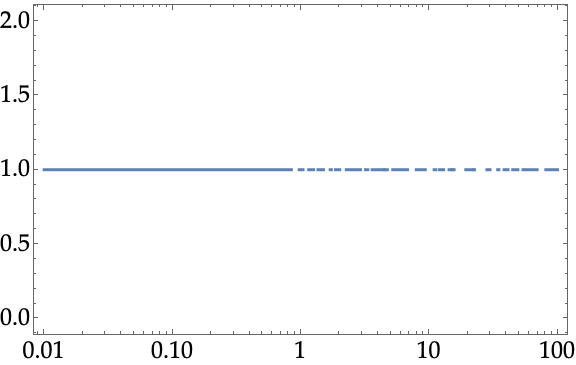

In [376]:
LogLinearPlot[g1pjunc[1,eta,0.1,0]g2junc[1,eta,0.1,0]-g2pjunc[1,eta,0.1,0]g1junc[1,eta,0.1,0], {eta,0.01,100}]

In [377]:
g1full[k_,eta_,etas_,w_] := g1RD[k eta] /; eta<=etas
g1full[k_,eta_,etas_,w_] := g1junc[k,eta,etas,w] /; eta>etas
g2full[k_,eta_,etas_,w_] := g2RD[k eta] /; eta<=etas
g2full[k_,eta_,etas_,w_] := g2junc[k,eta,etas,w] /; eta>etas

-Graphics-
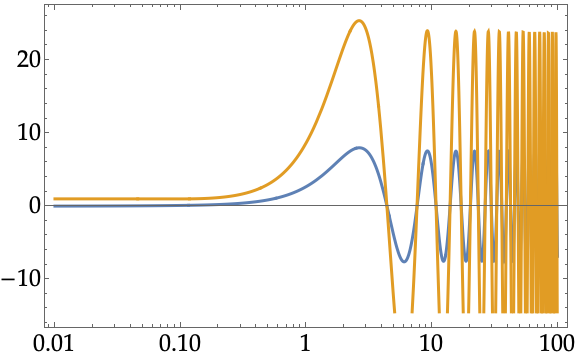

In [359]:
LogLinearPlot[{g1full[1,eta,0.1,0],g2full[1,eta,0.1,0]},{eta,0.01,100}]

In [386]:
GreenGmode[k_,eta_,etap_,etas_,w_] := g1full[k,eta,etas,w]g2full[k,etap,etas,w] - g2full[k,eta,etas,w]g1full[k,etap,etas,w]

-Graphics-
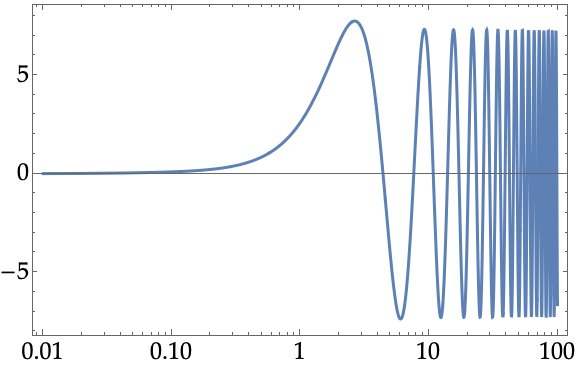

In [389]:
LogLinearPlot[GreenGmode[1,eta,0.01,0.1,0],{eta,0.01,100}]

In [416]:
dx = \[Pi];

In [419]:
Imono[k_,eta_,etas_,w_,cs_] := k^3 NIntegrate[scalea[etap,etas,w] GreenGmode[k,eta,etap,etas,w] 
                                                (2Phifull[etap,etas,w,cs]^2 
                                                + 4/(1+3EoSw[etap,etas,w])(Phifull[etap,etas,w,cs] + 1/calH[etap,etas,w] Phipfull[etap,etas,w,cs])^2 ), 
                                            {etap,0.01,eta}]
Imono2bar[k_,eta_,etas_,w_,cs_] := (Imono[k,eta-dx/2,etas,w,cs]^2 + Imono[k,eta-dx/4,etas,w,cs]^2 + Imono[k,eta,etas,w,cs]^2 
                                    + Imono[k,eta+dx/4,etas,w,cs]^2 + Imono[k,eta+dx/2,etas,w,cs]^2) /5;

In [423]:
OGWmonobar[k_,eta_,etas_,w_,cs_] := 8/243 (scalea[eta,etas,w]calH[eta,etas,w])^(-2) UnitStep[1-k/2]*(1-(k/2)^2)^2 (1/k)^2 Imono2bar[k,eta,etas,w,cs]

In [429]:
etas1 = 0.1;
w1 = 0.23;
cs1 = Sqrt[0.24];

In [ ]:
OGWList = Table[{10^logk,OGWmonobar[10^logk,400,etas1,w1,cs1] // Quiet}, {logk,-1,Log10[2],0.1}]; // AbsoluteTiming

-Graphics-
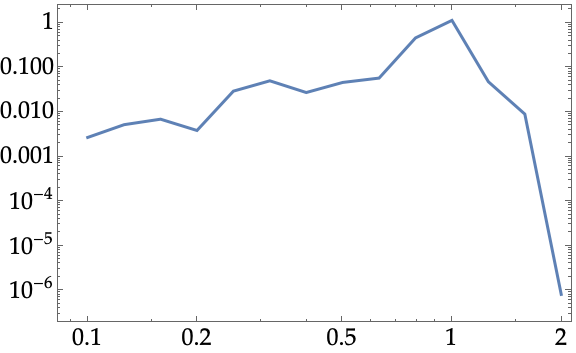

In [439]:
ListLogLogPlot[OGWList]

## QCD trace anomaly

In [ ]:
If1[x_] := NIntegrate[(y^2-1)^(3/2) / (E^(x y)+1), {y,1,10^5}, MinRecursion->9]
If2[x_] := NIntegrate[E^(x y)(y^2-1)^(3/2) / (E^(x y)+1)^2 y, {y,1,10^5}, MinRecursion->9]
Ib1[x_] := NIntegrate[(y^2-1)^(3/2) / (E^(x y)-1), {y,1,10^5}, MinRecursion->9]
Ib2[x_] := NIntegrate[E^(x y)(y^2-1)^(3/2) / (E^(x y)-1)^2 y, {y,1,10^5}, MinRecursion->9]

In [ ]:
DeltafList = Table[{10^logx, 10^(4logx)(10^logx If2[10^logx]-4If1[10^logx])}, {logx,-2,2,0.01}]; // AbsoluteTiming
DeltabList = Table[{10^logx, 10^(4logx)(10^logx Ib2[10^logx]-4Ib1[10^logx])}, {logx,-2,2,0.01}]; // AbsoluteTiming

Out[49]:
 
 
 
 
 Out[50]:


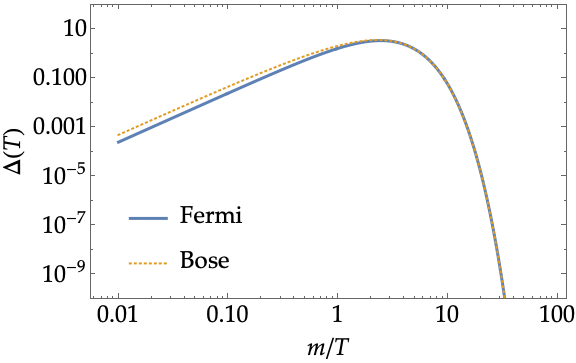

In [ ]:
FigTraceAnomaly = ListLogLogPlot[{DeltafList,DeltabList}, PlotStyle->{AbsoluteThickness[3],{AbsoluteThickness[2],Dotted}}, PlotRange->{10^-10,10^2}, 
                                   FrameLabel->{Row[{m, "/", T}], \[CapitalDelta][T]}, PlotLegends->Placed[{"Fermi","Bose"}, {0.2,0.2}]]

In [ ]:
Export["TraceAnomaly.pdf",FigTraceAnomaly];

5 + 3 w                                5 + 3 w
BesselJ[-----------, Sqrt[w] x] C[1]   BesselY[-----------, Sqrt[w] x] C[2]
        2 (1 + 3 w)                            2 (1 + 3 w)
------------------------------------ + ------------------------------------
               (5 + 3 w)/(2 + 6 w)                    (5 + 3 w)/(2 + 6 w)
  (2 x + 6 w x)                          (2 x + 6 w x)
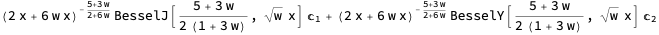

In [18]:
Phi[x] /. DSolve[{Phi''[x]+6(1+w)/(1+3w)/x Phi'[x]+w Phi[x] == 0}, Phi[x], x][[1]] 